In [61]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# For handling a bigger data set we need to scale it with bellow packages

In [63]:
from datasets import load_dataset

# Load the dataset with a specified number of rows
ds = load_dataset("imageomics/rare-species", split=f'train[:1500]')


KeyboardInterrupt: 

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Read the Data into a variable pro

In [64]:
#pro= pd.read_csv(r"C:\Users\Tangeni Matheus\smester 4\Data Analytics\DTA data.csv")
pro = ds

In [65]:
pro

Dataset({
    features: ['image', 'rarespecies_id', 'eol_content_id', 'eol_page_id', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName', 'common'],
    num_rows: 1500
})

# 2. Data Set cleaning
  
 **2.0 Filter the important columns**

In [66]:
pro = pro.remove_columns(['rarespecies_id', 'eol_content_id', 'eol_page_id', 'kingdom'])
pro

Dataset({
    features: ['image', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName', 'common'],
    num_rows: 1500
})

**2.1 Convert the dataset into a DataFrame**

In [67]:
pro = pro.to_pandas()

**2.2 Remove duplicates in the data**

first convert images to string then drop duplicates and convert the images string back to image.

In [68]:
from datasets import Dataset

pro['image'] = pro['image'].apply(lambda x: str(x))

pro = pro.drop_duplicates()
# Convert back to Dataset
pro = Dataset.from_pandas(pro)
pro

Dataset({
    features: ['image', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName', 'common'],
    num_rows: 1500
})

**2.2 We reset the index of the dataset rows to start from index 0 and to be uniform by incrementing by 1.**

In [69]:
pro = pro.reset_index(drop = True)
pro

AttributeError: 'Dataset' object has no attribute 'reset_index'

**2.3 Remove Empty rows**

In [70]:
pro.dropna()

AttributeError: 'Dataset' object has no attribute 'dropna'

In [71]:
pro

Dataset({
    features: ['image', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName', 'common'],
    num_rows: 1500
})

# 3 Analyzing the data set
**3.0 Using the plotly.express library we plotted a scatter plot to help visualize the data in order to understand our data**

In [29]:
import plotly.express as px

fig = px.scatter(pro, 
                 x='genus', 
                 y='species',
                 color='common',  # Use common names for color coding
                 hover_data=[ 'phylum', 'class', 'order', 'family', 'sciName'],  # Hover data without common name since it's used for coloring
                 title="Scatter Plot of Species by Genus and Common Name",
                 labels={'genus': 'Genus', 'species': 'Species', 'common': 'Common Name'})

fig.show()

**3.1 Checking for imbalanced data**


We are checking for the number of each common name in our dataset to ensure there are equal rows for each animal

In [47]:

pro = pro.to_pandas()

if isinstance(pro['common'], list):
    pro['common'] = pro['common'].apply(lambda x: x[0] if isinstance(x, list) else x)

common_name_counts = pro['common'].value_counts().reset_index()
common_name_counts.columns = ['common', 'count']

fig = px.bar(common_name_counts, 
             x='common', 
             y='count',  
             title='Number of Rows for Each Common Name',
             labels={'common': 'Common Name', 'count': 'Count'}, 
             color='count',
             text='count') 

fig.show()

**3.2 We are dropping the imbalanced data that does not have 30 values**

In [50]:

# Check if 'common' is in list format and flatten it if necessary
if isinstance(pro['common'], list):
    pro['common'] = pro['common'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Group by 'common' and count the occurrences
common_name_counts = pro['common'].value_counts().reset_index()
common_name_counts.columns = ['common', 'count']

# Filter out common names that do not have a count of 30
common_name_counts = common_name_counts[common_name_counts['count'] == 30]

# Check if any common names remain after filtering
if common_name_counts.empty:
    print("No common names with a count of 30.")
else:
    # Create a bar graph for the counts of each common name
    fig = px.bar(common_name_counts, 
                 x='common',  # x-axis as common names
                 y='count',   # y-axis as count
                 title='Common Names with Exactly 30 Rows',  # Title of the bar graph
                 labels={'common': 'Common Name', 'count': 'Count'},  # Axis labels
                 color='count',  # Color bars by count
                 text='count')   # Display counts on bars

    # Show the bar graph
    fig.show()

# Encoding
**Convert string values into numerical values using LabelEncoder**

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['image', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'sciName']:
    pro[col] = label_encoder.fit_transform(pro[col])

In [59]:
print(pro)

      image  phylum  class  order  family  genus  species  sciName  \
0         0       0      1      2      20     12       33       17   
1         1       0      1      2      20     12       33       17   
2         2       0      1      2      20     12       33       17   
3         3       0      1      2      20     12       33       17   
4         4       0      1      2      20     12       33       17   
...     ...     ...    ...    ...     ...    ...      ...      ...   
1495   1495       1      0     19      25     37        8       45   
1496   1496       1      0     19      25     37        8       45   
1497   1497       1      0     19      25     37        8       45   
1498   1498       1      0     19      25     37        8       45   
1499   1499       1      0     19      25     37        8       45   

               common  
0     Fen raft spider  
1     Fen raft spider  
2     Fen raft spider  
3     Fen raft spider  
4     Fen raft spider  
...            

**Exluding the kingdom because all are animals**

In [26]:
array = pro.values
X = array[:, 1:8]
Y = array[:, 8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation =model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [27]:
seed = 42
scoring = 'accuracy'

In [33]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


#scale the data set because its big.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
model = LogisticRegression(max_iter=7000)
model.fit(X_train_scaled, Y_train)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)


results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

c:\Users\Tangeni Matheus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Tangeni Matheus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

LR: 0.9012 (0.0180)
LDA: 1.0000 (0.0000)
KNN: 1.0000 (0.0000)
CART: 1.0000 (0.0000)
NB: 1.0000 (0.0000)
SVM: 0.4376 (0.0194)


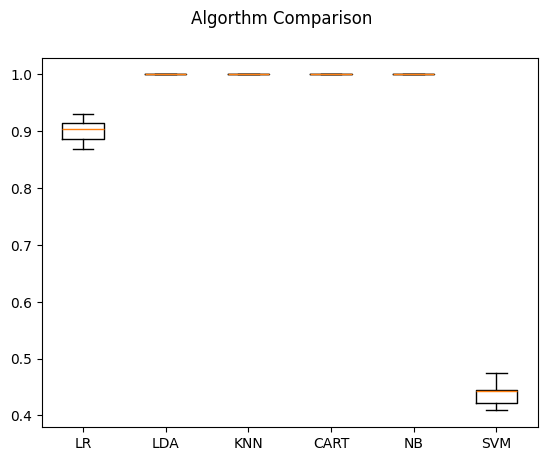

In [34]:
# Compare Algos
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [91]:
pro = DecisionTreeClassifier()
pro.fit(X_train, Y_train)
predictions = pro.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

0.9995828118481435

[[167   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 170   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  14   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 566   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 219   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 170   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0 475   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 297]]

              precision    recall

In [101]:
knn = KNeighborsClassifier(n_neighbors=5)

In [103]:
X = iris.data
y = iris.target

In [107]:
knn.fit(X,y)

KNeighborsClassifier()

In [109]:
knn.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])